In [10]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import radians, cos, sin, asin, sqrt, floor

### Define functions

In [26]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]

def smooth(x, window_len=11, window='hanning'):
    x = np.array(x)
    nans, y = nan_helper(x)
    x[nans] = np.interp(y(nans), y(~nans), x[~nans])
    s = np.r_[x[window_len - 1:0:-1], x, x[-2:-window_len - 1:-1]]
    if window == 'flat':  # moving average
        w = np.ones(window_len, 'd')
    else:
        w = eval('np.' + window + '(window_len)')
    y = np.convolve(w / w.sum(), s, mode='same')
    return y

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    return c * r

### Simple plot

Doesn't take into account the different length of segments

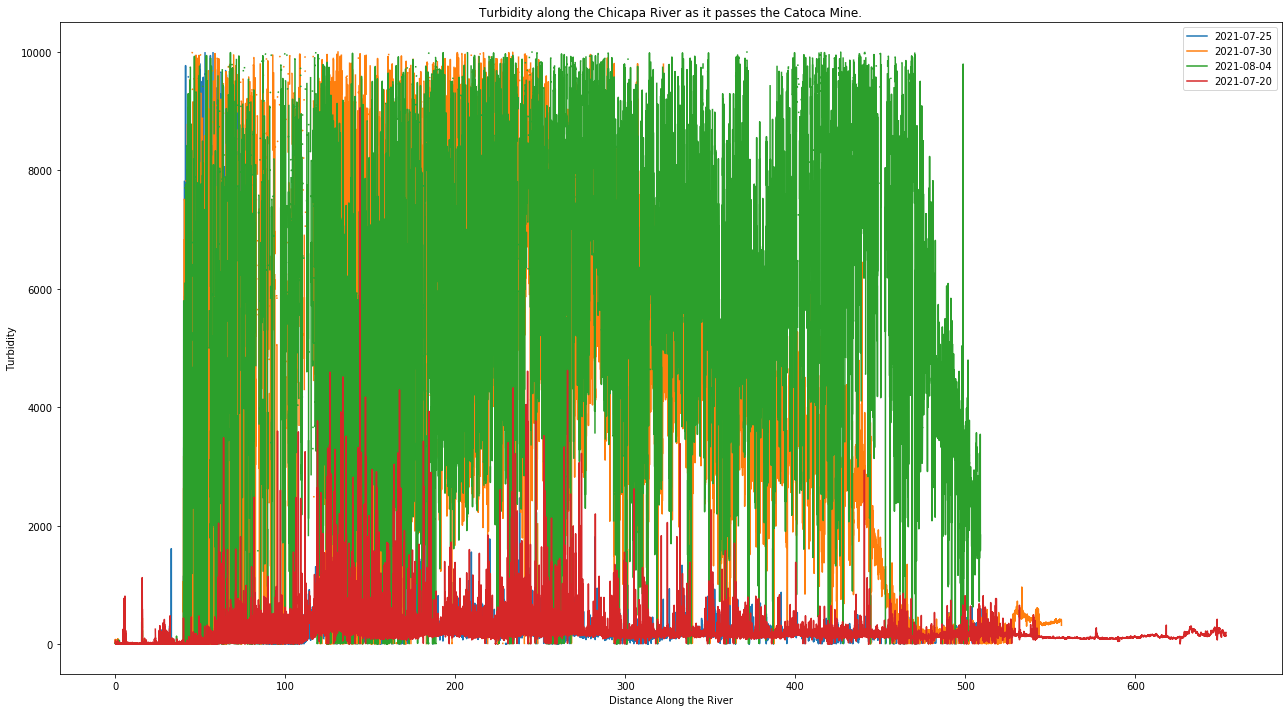

In [27]:
folder = "data/csv"
files = os.listdir(folder)
files.sort()
files = files[1:] + [files[0]]
fig, ax = plt.subplots(figsize=(18, 10))
ax.set_xlabel("Distance Along the River")
ax.set_ylabel("Turbidity")
for file in files:
    df = pd.read_csv(os.path.join(folder, file))
    distance = [0]
    for i in range(1, len(df)):
        distance.append(distance[-1] + haversine(df["Longitude"][i], df["Latitude"][i], df["Longitude"][i - 1], df["Latitude"][i-1]))
    # y = smooth(df["Turbidity"], window_len=1000)
    # x = range(len(y)) 
    y = df["Turbidity"]
    x = distance   
    ax.plot(distance, y, label=file.split("_")[1].split(".")[0])
plt.title("Turbidity along the Chicapa River as it passes the Catoca Mine.")
plt.legend()
plt.tight_layout()

In [12]:
df.head()

,Unnamed: 0,Bounding Box,Latitude,Longitude,Turbidity,Hue Angle
0,0,ldq_1,-9.480176,20.357231,12.096835,37.160118
1,1,ldq_1,-9.480176,20.357323,NaN,NaN
2,2,ldq_1,-9.480177,20.357414,NaN,NaN
3,3,ldq_1,-9.480177,20.357506,NaN,NaN
4,4,ldq_1,-9.480177,20.357595,NaN,NaN


In [18]:
distance = [0]
for i in range(1, len(df)):
    distance.append(distance[-1] + haversine(df["Longitude"][i], df["Latitude"][i], df["Longitude"][i - 1], df["Latitude"][i-1]))

[0, 0.01004116501456889]